
Logistic Regression Accuracy: 82.59%
              precision    recall  f1-score   support

     Harmful       0.81      0.96      0.88       137
 Non-Harmful       0.87      0.53      0.66        64

    accuracy                           0.83       201
   macro avg       0.84      0.75      0.77       201
weighted avg       0.83      0.83      0.81       201


Naive Bayes Accuracy: 88.56%
              precision    recall  f1-score   support

     Harmful       0.88      0.97      0.92       137
 Non-Harmful       0.92      0.70      0.80        64

    accuracy                           0.89       201
   macro avg       0.90      0.84      0.86       201
weighted avg       0.89      0.89      0.88       201


Random Forest Accuracy: 87.56%
              precision    recall  f1-score   support

     Harmful       0.88      0.95      0.91       137
 Non-Harmful       0.87      0.72      0.79        64

    accuracy                           0.88       201
   macro avg       0.87     

C:\Users\shrey\AppData\Local\Temp\ipykernel_11480\3704001312.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette="Set2")


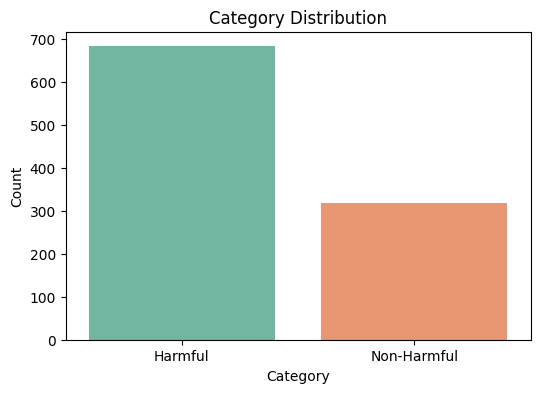

C:\Users\shrey\AppData\Local\Temp\ipykernel_11480\3704001312.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")


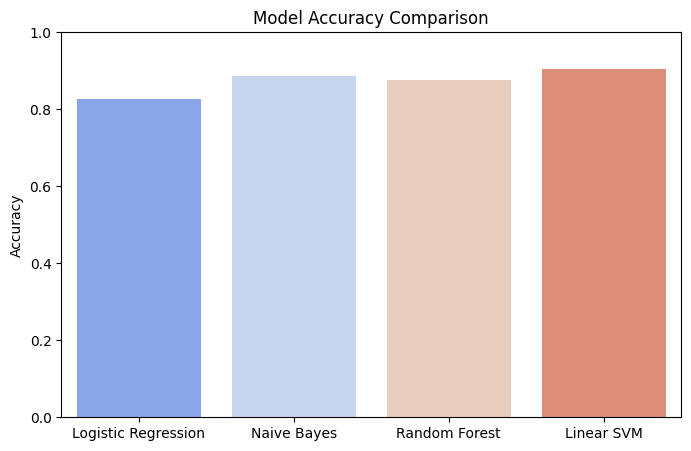

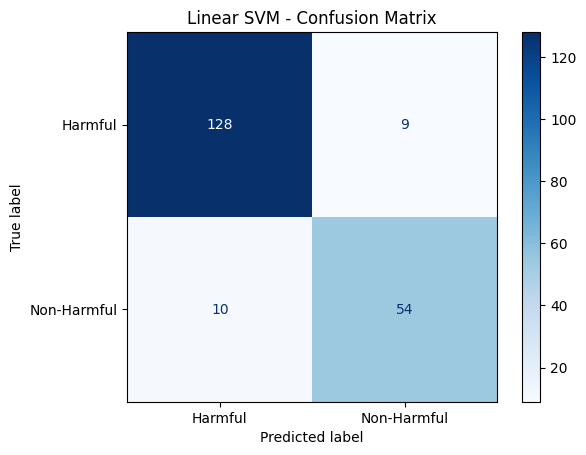

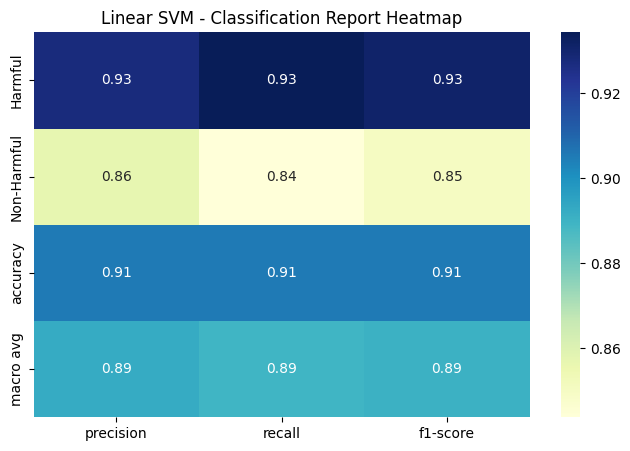


✅ Saved Best Model: Linear SVM as 'best_model.pkl'
✅ Saved Label Encoder as 'label_encoder.pkl'


In [1]:
# ---------- train_model_with_encoding.py ------------
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)

# -------------------- Preprocessing --------------------
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = ' '.join(text.split())
    return text

# -------------------- Load and Prepare Data --------------------
df = pd.read_csv('cleaned_harmful_non_harmful1.csv')
df['Text'] = df['Text'].astype(str).apply(preprocess_text)

# Label Encoding (convert categories -> numbers)
le = LabelEncoder()
df['Label_Encoded'] = le.fit_transform(df['Label'])

X = df['Text']
y = df['Label_Encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------- Models --------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Linear SVM": LinearSVC()
}

results = {}
pipelines = {}

# -------------------- Train & Evaluate --------------------
for name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    pipelines[name] = pipeline

    print(f"\n{name} Accuracy: {acc:.2%}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# -------------------- Graph 1: Category Distribution --------------------
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df, palette="Set2")
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# -------------------- Graph 2: Accuracy Bar Chart --------------------
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.show()

# -------------------- Graph 3: Confusion Matrix (Best Model) --------------------
best_model_name = max(results, key=results.get)
best_pipeline = pipelines[best_model_name]
y_pred_best = best_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title(f"{best_model_name} - Confusion Matrix")
plt.show()

# -------------------- Graph 4: Classification Report Heatmap --------------------
report = classification_report(
    y_test, y_pred_best, output_dict=True, target_names=le.classes_, zero_division=0
)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title(f"{best_model_name} - Classification Report Heatmap")
plt.show()

# -------------------- Save Best Model + Encoder --------------------
joblib.dump(best_pipeline, 'best_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
print(f"\n✅ Saved Best Model: {best_model_name} as 'best_model.pkl'")
print("✅ Saved Label Encoder as 'label_encoder.pkl'")


📊 Training models...

Logistic Regression Accuracy: 82.59%
              precision    recall  f1-score   support

     Harmful       0.81      0.96      0.88       137
 Non-Harmful       0.87      0.53      0.66        64

    accuracy                           0.83       201
   macro avg       0.84      0.75      0.77       201
weighted avg       0.83      0.83      0.81       201


Naive Bayes Accuracy: 88.56%
              precision    recall  f1-score   support

     Harmful       0.88      0.97      0.92       137
 Non-Harmful       0.92      0.70      0.80        64

    accuracy                           0.89       201
   macro avg       0.90      0.84      0.86       201
weighted avg       0.89      0.89      0.88       201


Random Forest Accuracy: 89.05%
              precision    recall  f1-score   support

     Harmful       0.88      0.97      0.92       137
 Non-Harmful       0.92      0.72      0.81        64

    accuracy                           0.89       201
   macr

C:\Users\shrey\AppData\Local\Temp\ipykernel_5460\1259004306.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette="Set2")


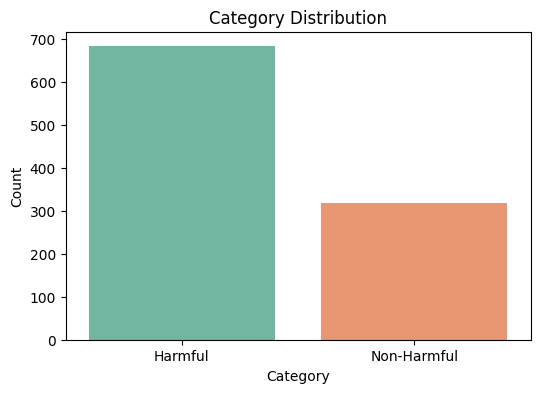

C:\Users\shrey\AppData\Local\Temp\ipykernel_5460\1259004306.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")


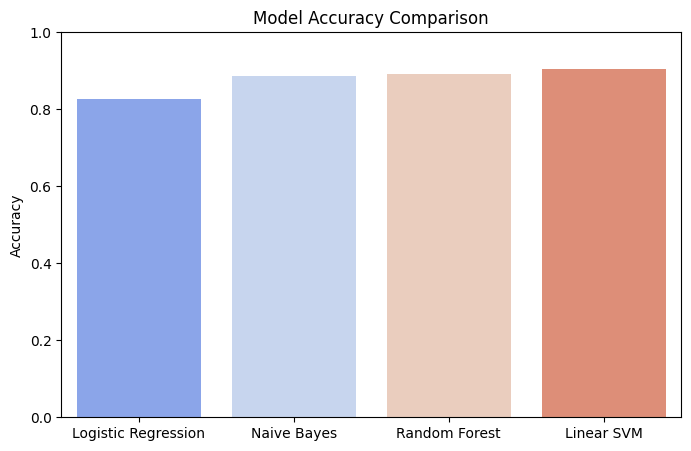

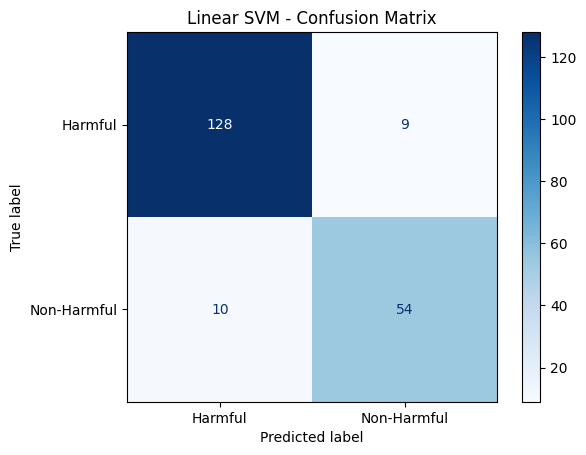

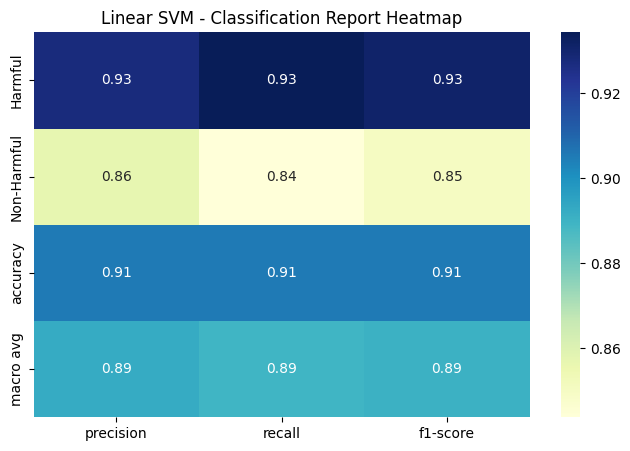


✅ Saved Best Model: Linear SVM as 'best_model.pkl'
✅ Saved Label Encoder as 'label_encoder.pkl'


In [7]:
# ---------- harmful_text_detector_full.py ------------
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tkinter as tk
from tkinter import messagebox, scrolledtext
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)

# -------------------- Preprocessing --------------------
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = ' '.join(text.split())
    return text


# -------------------- Rule-Based Quick Check --------------------
def rule_based_check(text):
    harmful_keywords = ["fool", "idiot", "stupid", "dumb", "moron", "hate", "useless", "bastard", "loser", "ugly","bad","hot","guu"]
    non_harmful_keywords = ["sweet", "good", "kind", "nice", "beautiful", "love", "friend", "awesome", "cute","pretty","sundar","stunning","gorgeous"]

    text = text.lower()
    for word in harmful_keywords:
        if word in text:
            return "Harmful"
    for word in non_harmful_keywords:
        if word in text:
            return "Safe"
    return None


# -------------------- Training Phase --------------------
def train_and_save():
    print("📊 Training models...")

    df = pd.read_csv('cleaned_harmful_non_harmful1.csv')
    df['Text'] = df['Text'].astype(str).apply(preprocess_text)

    # Label Encoding
    le = LabelEncoder()
    df['Label_Encoded'] = le.fit_transform(df['Label'])

    X = df['Text']
    y = df['Label_Encoded']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Naive Bayes": MultinomialNB(),
        "Random Forest": RandomForestClassifier(),
        "Linear SVM": LinearSVC()
    }

    results = {}
    pipelines = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
            ('clf', model)
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        pipelines[name] = pipeline

        print(f"\n{name} Accuracy: {acc:.2%}")
        print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Graph 1: Category Distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Label', data=df, palette="Set2")
    plt.title("Category Distribution")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.show()

    # Graph 2: Accuracy Comparison
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.title('Model Accuracy Comparison')
    plt.show()

    # Best model
    best_model_name = max(results, key=results.get)
    best_pipeline = pipelines[best_model_name]
    y_pred_best = best_pipeline.predict(X_test)

    # Graph 3: Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_best)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"{best_model_name} - Confusion Matrix")
    plt.show()

    # Graph 4: Classification Report Heatmap
    report = classification_report(
        y_test, y_pred_best, output_dict=True, target_names=le.classes_, zero_division=0
    )
    report_df = pd.DataFrame(report).transpose()

    plt.figure(figsize=(8, 5))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f"{best_model_name} - Classification Report Heatmap")
    plt.show()

    # Save model + encoder
    joblib.dump(best_pipeline, 'best_model.pkl')
    joblib.dump(le, 'label_encoder.pkl')
    print(f"\n✅ Saved Best Model: {best_model_name} as 'best_model.pkl'")
    print("✅ Saved Label Encoder as 'label_encoder.pkl'")


# -------------------- GUI Functions --------------------
def log_non_harmful(content):
    with open("harmless_logs.txt", "a", encoding="utf-8") as file:
        file.write(content.strip() + "\n")


def predict_from_gui():
    user_input = entry.get()
    if not user_input.strip():
        messagebox.showwarning("Warning", "Please enter some text.")
        return

    cleaned_input = preprocess_text(user_input)
    rule_result = rule_based_check(cleaned_input)

    if rule_result:
        prediction = rule_result
    else:
        prediction_encoded = pipeline.predict([cleaned_input])[0]
        prediction = label_encoder.inverse_transform([prediction_encoded])[0]

    if prediction == "Harmful":
        messagebox.showerror("Blocked 🚫", "This content is identified as Harmful.\nIt won't be saved.")
        entry.delete(0, tk.END)
        return
    else:
        log_non_harmful(user_input)
        messagebox.showinfo("Result ✅", f"This content is: {prediction}")
        entry.delete(0, tk.END)


def clear_gui():
    entry.delete(0, tk.END)


def show_logs():
    try:
        with open("harmless_logs.txt", "r", encoding="utf-8") as file:
            logs = file.read()
    except FileNotFoundError:
        logs = "No logs found yet."

    log_window = tk.Toplevel(root)
    log_window.title("Harmless Content Logs")
    log_window.geometry("400x300")
    log_window.configure(bg="#ffffff")

    log_label = tk.Label(log_window, text="Logged Non-Harmful Inputs:", bg="#ffffff", font=("Arial", 12))
    log_label.pack(pady=5)

    text_area = scrolledtext.ScrolledText(log_window, wrap=tk.WORD, width=40, height=12, font=("Arial", 10))
    text_area.pack(pady=5)
    text_area.insert(tk.END, logs)
    text_area.config(state=tk.DISABLED)


# -------------------- MAIN --------------------
if __name__ == "__main__":
    # Step 1: Train models & save best one
    train_and_save()

    # Step 2: Load best saved model + encoder
    pipeline = joblib.load('best_model.pkl')
    label_encoder = joblib.load('label_encoder.pkl')

    # Step 3: Launch GUI
    root = tk.Tk()
    root.title("Harmful Content Detector - GUI")
    root.geometry("500x300")
    root.configure(bg="#ffffff")

    title_label = tk.Label(root, text="Harmful Content Detection System", bg="#ffffff", font=("Arial", 16, "bold"))
    title_label.pack(pady=10)

    label = tk.Label(root, text="Enter your sentence:", bg="#ffffff", font=("Arial", 12))
    label.pack(pady=5)

    entry = tk.Entry(root, width=50, font=("Arial", 12))
    entry.pack(pady=5)

    frame = tk.Frame(root, bg="#ffffff")
    frame.pack(pady=10)

    predict_button = tk.Button(frame, text="Check", command=predict_from_gui, bg="#4CAF50", fg="white", font=("Arial", 12))
    predict_button.grid(row=0, column=0, padx=10)

    clear_button = tk.Button(frame, text="Clear", command=clear_gui, bg="#f44336", fg="white", font=("Arial", 12))
    clear_button.grid(row=0, column=1, padx=10)

    logs_button = tk.Button(root, text="View Non-Harmful Logs", command=show_logs, bg="#2196F3", fg="white", font=("Arial", 12))
    logs_button.pack(pady=10)

    root.mainloop()


📊 Training models...

Logistic Regression Accuracy: 82.59%
              precision    recall  f1-score   support

     Harmful       0.81      0.96      0.88       137
 Non-Harmful       0.87      0.53      0.66        64

    accuracy                           0.83       201
   macro avg       0.84      0.75      0.77       201
weighted avg       0.83      0.83      0.81       201


Naive Bayes Accuracy: 88.56%
              precision    recall  f1-score   support

     Harmful       0.88      0.97      0.92       137
 Non-Harmful       0.92      0.70      0.80        64

    accuracy                           0.89       201
   macro avg       0.90      0.84      0.86       201
weighted avg       0.89      0.89      0.88       201


Random Forest Accuracy: 87.06%
              precision    recall  f1-score   support

     Harmful       0.86      0.96      0.91       137
 Non-Harmful       0.90      0.67      0.77        64

    accuracy                           0.87       201
   macr

C:\Users\shrey\AppData\Local\Temp\ipykernel_11376\2639726857.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette="Set2")


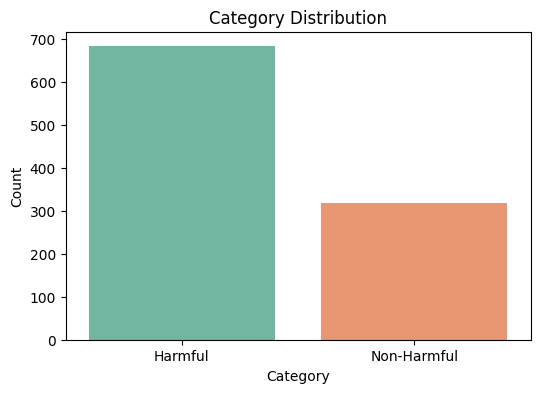

C:\Users\shrey\AppData\Local\Temp\ipykernel_11376\2639726857.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")


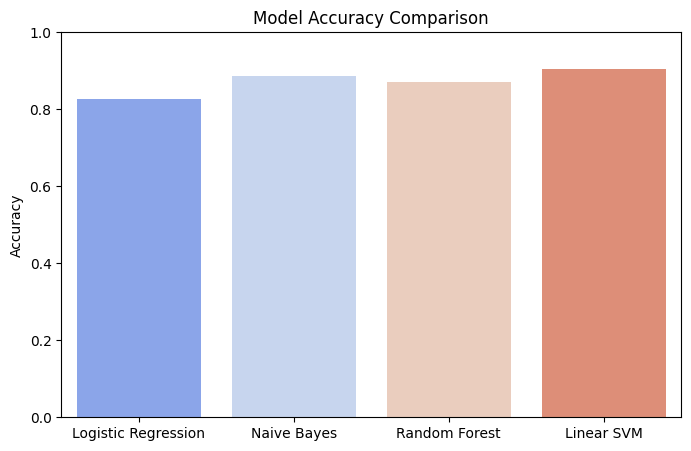

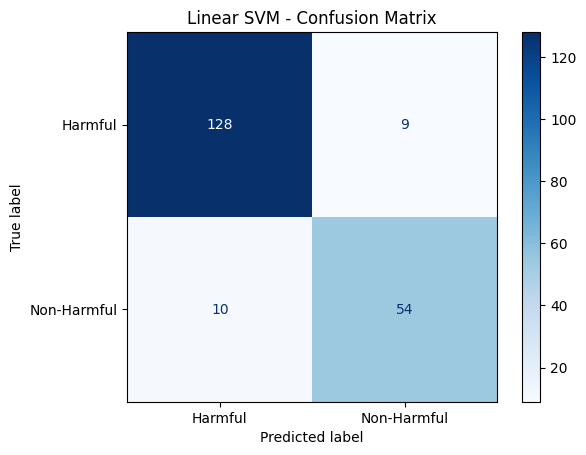

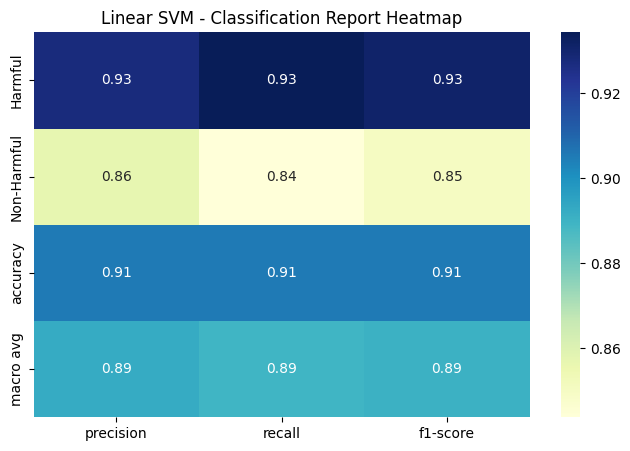


✅ Saved Best Model: Linear SVM as 'best_model.pkl'
✅ Saved Label Encoder as 'label_encoder.pkl'


In [1]:
# ---------- harmful_text_detector_full_multilang.py ------------
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tkinter as tk
from tkinter import messagebox, scrolledtext
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 42   # For consistent language detection

# -------------------- Preprocessing --------------------
def preprocess_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = ' '.join(text.split())
    return text


# -------------------- Rule-Based Quick Check --------------------
def rule_based_check(text):
    harmful_keywords = ["fool", "idiot", "stupid", "dumb", "moron", "hate", "useless", "bastard", "loser", "ugly","bad","hot","guu"]
    non_harmful_keywords = ["sweet", "good", "kind", "nice", "beautiful", "love", "friend", "awesome", "cute","pretty","sundar","stunning","gorgeous"]

    text = text.lower()
    for word in harmful_keywords:
        if word in text:
            return "Harmful"
    for word in non_harmful_keywords:
        if word in text:
            return "Safe"
    return None


# -------------------- Training Phase --------------------
def train_and_save():
    print("📊 Training models...")

    df = pd.read_csv('cleaned_harmful_non_harmful1.csv')
    df['Text'] = df['Text'].astype(str).apply(preprocess_text)

    # Detect language for each text
    df['Language'] = df['Text'].apply(lambda x: detect(x) if x.strip() != "" else "unknown")

    # Label Encoding
    le = LabelEncoder()
    df['Label_Encoded'] = le.fit_transform(df['Label'])

    X = df['Text']
    y = df['Label_Encoded']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Naive Bayes": MultinomialNB(),
        "Random Forest": RandomForestClassifier(),
        "Linear SVM": LinearSVC()
    }

    results = {}
    pipelines = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
            ('clf', model)
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        pipelines[name] = pipeline

        print(f"\n{name} Accuracy: {acc:.2%}")
        print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Graph 1: Category Distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Label', data=df, palette="Set2")
    plt.title("Category Distribution")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.show()

    # Graph 2: Accuracy Comparison
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.title('Model Accuracy Comparison')
    plt.show()

    # Best model
    best_model_name = max(results, key=results.get)
    best_pipeline = pipelines[best_model_name]
    y_pred_best = best_pipeline.predict(X_test)

    # Graph 3: Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_best)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"{best_model_name} - Confusion Matrix")
    plt.show()

    # Graph 4: Classification Report Heatmap
    report = classification_report(
        y_test, y_pred_best, output_dict=True, target_names=le.classes_, zero_division=0
    )
    report_df = pd.DataFrame(report).transpose()

    plt.figure(figsize=(8, 5))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f"{best_model_name} - Classification Report Heatmap")
    plt.show()

   

    # Save model + encoder
    joblib.dump(best_pipeline, 'best_model.pkl')
    joblib.dump(le, 'label_encoder.pkl')
    print(f"\n✅ Saved Best Model: {best_model_name} as 'best_model.pkl'")
    print("✅ Saved Label Encoder as 'label_encoder.pkl'")


# -------------------- GUI Functions --------------------
def log_non_harmful(content):
    with open("harmless_logs.txt", "a", encoding="utf-8") as file:
        file.write(content.strip() + "\n")


def predict_from_gui():
    user_input = entry.get()
    if not user_input.strip():
        messagebox.showwarning("Warning", "Please enter some text.")
        return

    cleaned_input = preprocess_text(user_input)
    rule_result = rule_based_check(cleaned_input)

    if rule_result:
        prediction = rule_result
    else:
        prediction_encoded = pipeline.predict([cleaned_input])[0]
        prediction = label_encoder.inverse_transform([prediction_encoded])[0]

    if prediction == "Harmful":
        messagebox.showerror("Blocked 🚫", "This content is identified as Harmful.\nIt won't be saved.")
        entry.delete(0, tk.END)
        return
    else:
        log_non_harmful(user_input)
        messagebox.showinfo("Result ✅", f"This content is: {prediction}")
        entry.delete(0, tk.END)


def clear_gui():
    entry.delete(0, tk.END)


def show_logs():
    try:
        with open("harmless_logs.txt", "r", encoding="utf-8") as file:
            logs = file.read()
    except FileNotFoundError:
        logs = "No logs found yet."

    log_window = tk.Toplevel(root)
    log_window.title("Harmless Content Logs")
    log_window.geometry("400x300")
    log_window.configure(bg="#ffffff")

    log_label = tk.Label(log_window, text="Logged Non-Harmful Inputs:", bg="#ffffff", font=("Arial", 12))
    log_label.pack(pady=5)

    text_area = scrolledtext.ScrolledText(log_window, wrap=tk.WORD, width=40, height=12, font=("Arial", 10))
    text_area.pack(pady=5)
    text_area.insert(tk.END, logs)
    text_area.config(state=tk.DISABLED)


# -------------------- MAIN --------------------
if __name__ == "__main__":
    # Step 1: Train models & save best one
    train_and_save()

    # Step 2: Load best saved model + encoder
    pipeline = joblib.load('best_model.pkl')
    label_encoder = joblib.load('label_encoder.pkl')

    # Step 3: Launch GUI
    root = tk.Tk()
    root.title("Harmful Content Detector - Multilingual GUI")
    root.geometry("500x300")
    root.configure(bg="#ffffff")

    title_label = tk.Label(root, text="Harmful Content Detection System", bg="#ffffff", font=("Arial", 16, "bold"))
    title_label.pack(pady=10)

    label = tk.Label(root, text="Enter your sentence:", bg="#ffffff", font=("Arial", 12))
    label.pack(pady=5)

    entry = tk.Entry(root, width=50, font=("Arial", 12))
    entry.pack(pady=5)

    frame = tk.Frame(root, bg="#ffffff")
    frame.pack(pady=10)

    predict_button = tk.Button(frame, text="Check", command=predict_from_gui, bg="#4CAF50", fg="white", font=("Arial", 12))
    predict_button.grid(row=0, column=0, padx=10)

    clear_button = tk.Button(frame, text="Clear", command=clear_gui, bg="#f44336", fg="white", font=("Arial", 12))
    clear_button.grid(row=0, column=1, padx=10)

    logs_button = tk.Button(root, text="View Non-Harmful Logs", command=show_logs, bg="#2196F3", fg="white", font=("Arial", 12))
    logs_button.pack(pady=10)

    root.mainloop()


📊 Training models...

Logistic Regression Accuracy: 82.59%
              precision    recall  f1-score   support

     Harmful       0.81      0.96      0.88       137
 Non-Harmful       0.87      0.53      0.66        64

    accuracy                           0.83       201
   macro avg       0.84      0.75      0.77       201
weighted avg       0.83      0.83      0.81       201


Naive Bayes Accuracy: 88.56%
              precision    recall  f1-score   support

     Harmful       0.88      0.97      0.92       137
 Non-Harmful       0.92      0.70      0.80        64

    accuracy                           0.89       201
   macro avg       0.90      0.84      0.86       201
weighted avg       0.89      0.89      0.88       201


Random Forest Accuracy: 87.56%
              precision    recall  f1-score   support

     Harmful       0.86      0.98      0.91       137
 Non-Harmful       0.93      0.66      0.77        64

    accuracy                           0.88       201
   macr

C:\Users\shrey\AppData\Local\Temp\ipykernel_17920\1506892994.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette="Set2")


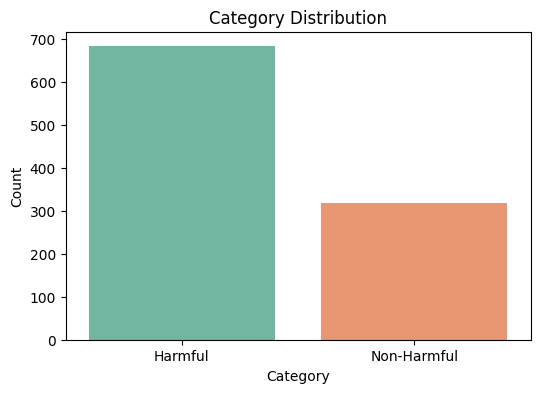

C:\Users\shrey\AppData\Local\Temp\ipykernel_17920\1506892994.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")


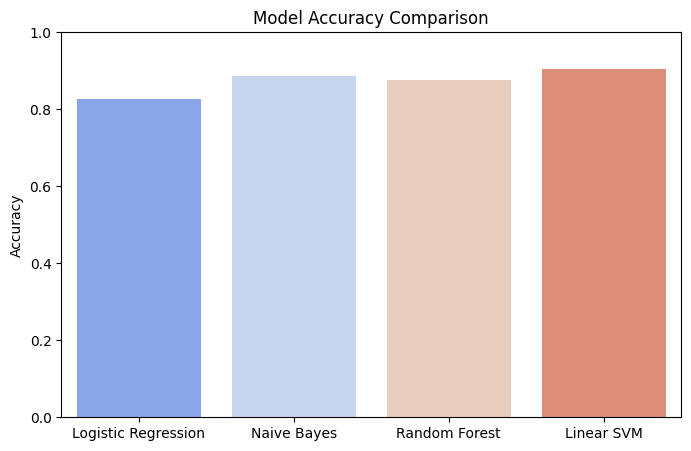

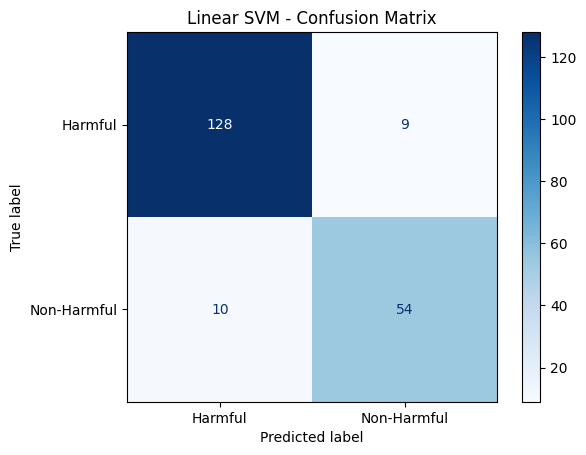

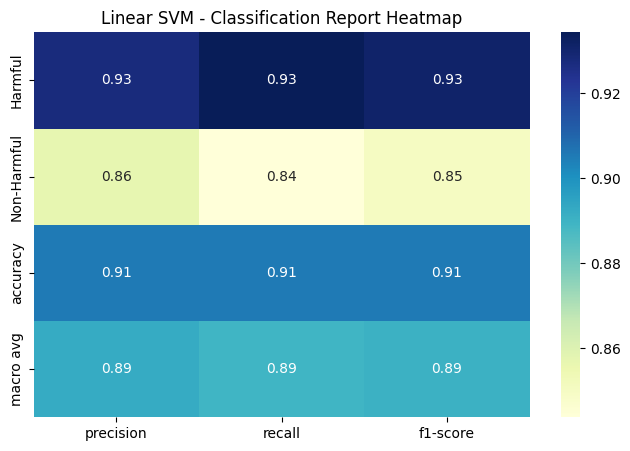


🔬 Performing Clustering Analysis...


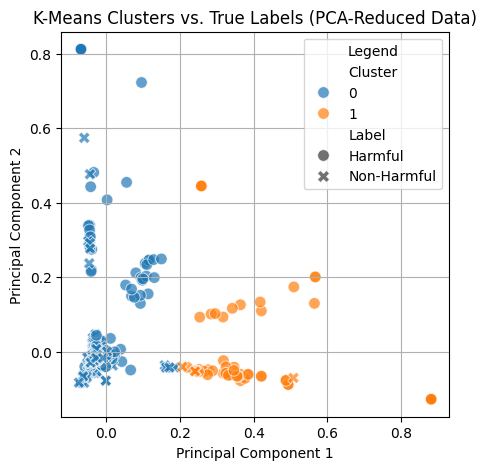


✅ Saved Best Model: Linear SVM as 'best_model.pkl'
✅ Saved Label Encoder as 'label_encoder.pkl'


In [ ]:
# ---------- harmful_text_detector_full_multilang.py ------------
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tkinter as tk
from tkinter import messagebox, scrolledtext
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 42    # For consistent language detection

# New imports for clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# -------------------- Preprocessing --------------------
def preprocess_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = ' '.join(text.split())
    return text


# -------------------- Rule-Based Quick Check --------------------
def rule_based_check(text):
    harmful_keywords = ["fool", "idiot", "stupid", "dumb", "moron", "hate", "useless", "bastard", "loser", "ugly","bad","hot","guu"]
    non_harmful_keywords = ["sweet", "good", "kind", "nice", "beautiful", "love", "friend", "awesome", "cute","pretty","sundar","stunning","gorgeous"]

    text = text.lower()
    for word in harmful_keywords:
        if word in text:
            return "Harmful"
    for word in non_harmful_keywords:
        if word in text:
            return "Safe"
    return None


# -------------------- Training Phase --------------------
def train_and_save():
    print("📊 Training models...")

    df = pd.read_csv('cleaned_harmful_non_harmful1.csv')
    df['Text'] = df['Text'].astype(str).apply(preprocess_text)

    # Detect language for each text
    df['Language'] = df['Text'].apply(lambda x: detect(x) if x.strip() != "" else "unknown")

    # Label Encoding
    le = LabelEncoder()
    df['Label_Encoded'] = le.fit_transform(df['Label'])

    X = df['Text']
    y = df['Label_Encoded']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Naive Bayes": MultinomialNB(),
        "Random Forest": RandomForestClassifier(),
        "Linear SVM": LinearSVC()
    }

    results = {}
    pipelines = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
            ('clf', model)
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        pipelines[name] = pipeline

        print(f"\n{name} Accuracy: {acc:.2%}")
        print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Graph 1: Category Distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Label', data=df, palette="Set2")
    plt.title("Category Distribution")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.show()

    # Graph 2: Accuracy Comparison
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.title('Model Accuracy Comparison')
    plt.show()

    # Best model
    best_model_name = max(results, key=results.get)
    best_pipeline = pipelines[best_model_name]
    y_pred_best = best_pipeline.predict(X_test)

    # Graph 3: Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_best)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"{best_model_name} - Confusion Matrix")
    plt.show()

    # Graph 4: Classification Report Heatmap
    report = classification_report(
        y_test, y_pred_best, output_dict=True, target_names=le.classes_, zero_division=0
    )
    report_df = pd.DataFrame(report).transpose()

    plt.figure(figsize=(8, 5))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f"{best_model_name} - Classification Report Heatmap")
    plt.show()
    
    # -------------------- NEW: Clustering Analysis --------------------
    print("\n🔬 Performing Clustering Analysis...")
    # Get the TF-IDF features from the best pipeline's preprocessor
    tfidf_vectorizer = best_pipeline.named_steps['tfidf']
    X_tfidf = tfidf_vectorizer.transform(X)

    # Reduce dimensionality for visualization using PCA
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_tfidf.toarray())

    # Perform KMeans Clustering (unsupervised)
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_pca)

    # Add PCA and cluster results to the main DataFrame for plotting
    df['pca-one'] = X_pca[:, 0]
    df['pca-two'] = X_pca[:, 1]
    df['Cluster'] = clusters

    # Graph 5: PCA-based Cluster Plot with True Labels
    plt.figure(figsize=(5, 5))
    # Plot using seaborn to show both cluster and original labels
    sns.scatterplot(
        x="pca-one", y="pca-two",
        hue="Cluster", # Color by KMeans cluster
        style="Label", # Use marker style for the true label
        data=df,
        palette="tab10",
        s=70,
        alpha=0.7
    )
    plt.title("K-Means Clusters vs. True Labels (PCA-Reduced Data)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Legend', loc='best')
    plt.grid(True)
    plt.show()

    # -------------------- End of NEW section --------------------

    # Save best model + encoder
    joblib.dump(best_pipeline, 'best_model.pkl')
    joblib.dump(le, 'label_encoder.pkl')
    print(f"\n✅ Saved Best Model: {best_model_name} as 'best_model.pkl'")
    print("✅ Saved Label Encoder as 'label_encoder.pkl'")


# -------------------- GUI Functions --------------------
def log_non_harmful(content):
    with open("harmless_logs.txt", "a", encoding="utf-8") as file:
        file.write(content.strip() + "\n")


def predict_from_gui():
    user_input = entry.get()
    if not user_input.strip():
        messagebox.showwarning("Warning", "Please enter some text.")
        return

    cleaned_input = preprocess_text(user_input)
    rule_result = rule_based_check(cleaned_input)

    if rule_result:
        prediction = rule_result
    else:
        try:
            prediction_encoded = pipeline.predict([cleaned_input])[0]
            prediction = label_encoder.inverse_transform([prediction_encoded])[0]
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred during prediction: {e}")
            return

    if prediction == "Harmful":
        messagebox.showerror("Blocked 🚫", "This content is identified as Harmful.\nIt won't be saved.")
        entry.delete(0, tk.END)
        return
    else:
        log_non_harmful(user_input)
        messagebox.showinfo("Result ✅", f"This content is: {prediction}")
        entry.delete(0, tk.END)


def clear_gui():
    entry.delete(0, tk.END)


def show_logs():
    try:
        with open("harmless_logs.txt", "r", encoding="utf-8") as file:
            logs = file.read()
    except FileNotFoundError:
        logs = "No logs found yet."

    log_window = tk.Toplevel(root)
    log_window.title("Harmless Content Logs")
    log_window.geometry("400x300")
    log_window.configure(bg="#ffffff")

    log_label = tk.Label(log_window, text="Logged Non-Harmful Inputs:", bg="#ffffff", font=("Arial", 12))
    log_label.pack(pady=5)

    text_area = scrolledtext.ScrolledText(log_window, wrap=tk.WORD, width=40, height=12, font=("Arial", 10))
    text_area.pack(pady=5)
    text_area.insert(tk.END, logs)
    text_area.config(state=tk.DISABLED)


# -------------------- MAIN --------------------
if __name__ == "__main__":
    # Step 1: Train models & save best one
    train_and_save()

    # Step 2: Load best saved model + encoder
    pipeline = joblib.load('best_model.pkl')
    label_encoder = joblib.load('label_encoder.pkl')

    # Step 3: Launch GUI
    root = tk.Tk()
    root.title("Harmful Content Detector - Multilingual GUI")
    root.geometry("500x300")
    root.configure(bg="#ffffff")

    title_label = tk.Label(root, text="Harmful Content Detection System", bg="#ffffff", font=("Arial", 16, "bold"))
    title_label.pack(pady=10)

    label = tk.Label(root, text="Enter your sentence:", bg="#ffffff", font=("Arial", 12))
    label.pack(pady=5)

    entry = tk.Entry(root, width=50, font=("Arial", 12))
    entry.pack(pady=5)

    frame = tk.Frame(root, bg="#ffffff")
    frame.pack(pady=10)

    predict_button = tk.Button(frame, text="Check", command=predict_from_gui, bg="#4CAF50", fg="white", font=("Arial", 12))
    predict_button.grid(row=0, column=0, padx=10)

    clear_button = tk.Button(frame, text="Clear", command=clear_gui, bg="#f44336", fg="white", font=("Arial", 12))
    clear_button.grid(row=0, column=1, padx=10)

    logs_button = tk.Button(root, text="View Non-Harmful Logs", command=show_logs, bg="#2196F3", fg="white", font=("Arial", 12))
    logs_button.pack(pady=10)

    root.mainloop()